### Plot for the all-to-all Hamiltonian continuity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e_x = 10*(np.random.rand(3)*2 -1)  
e_y = 10*(np.random.rand(3)*2 -1)
e_z = 10*(np.random.rand(3)*2 -1)  

In [3]:
## RESULTS ARRAY GENERATION ##

def find_shortest_vector(e_x, e_y, e_z, range_limit=10):
    shortest_length = float('inf')
    shortest_vector = None
    best_a = best_b = best_c = None

    for a in range(-range_limit, range_limit + 1):
        for b in range(-range_limit, range_limit + 1):
            for c in range(-range_limit, range_limit + 1):
                if a == 0 and b == 0 and c == 0:
                    continue  # skip the zero vector
                v = a * e_x + b * e_y + c * e_z
                length = np.linalg.norm(v)
                if length < shortest_length:
                    shortest_length = length
                    shortest_vector = v
                    best_a = a
                    best_b = b
                    best_c = c

    return shortest_vector, shortest_length, best_a, best_b, best_c

# norms of the basis vectors
norm_e_x = np.linalg.norm(e_x)
norm_e_y = np.linalg.norm(e_y)
norm_e_z = np.linalg.norm(e_z)

# define increments inversely proportional to the norms
increments_x = np.linspace(0, 20/norm_e_x, 100)
increments_y = np.linspace(0, 20/norm_e_y, 100)
increments_z = np.linspace(0, 20/norm_e_z, 100)

results = []

# increment the basis vectors and find the shortest vector for each step
for inc_x, inc_y, inc_z in zip(increments_x, increments_y, increments_z):
    incremented_e_x = e_x + inc_x
    incremented_e_y = e_y + inc_y
    incremented_e_z = e_z + inc_z
    
    shortest_vector, shortest_length, best_a, best_b, best_c = find_shortest_vector(incremented_e_x, incremented_e_y, incremented_e_z)
    
    result = {
        'incremented_e_x': incremented_e_x,
        'incremented_e_y': incremented_e_y,
        'incremented_e_z': incremented_e_z,
        'best_a': best_a,
        'best_b': best_b,
        'best_c': best_c
    }
    
    results.append(result)

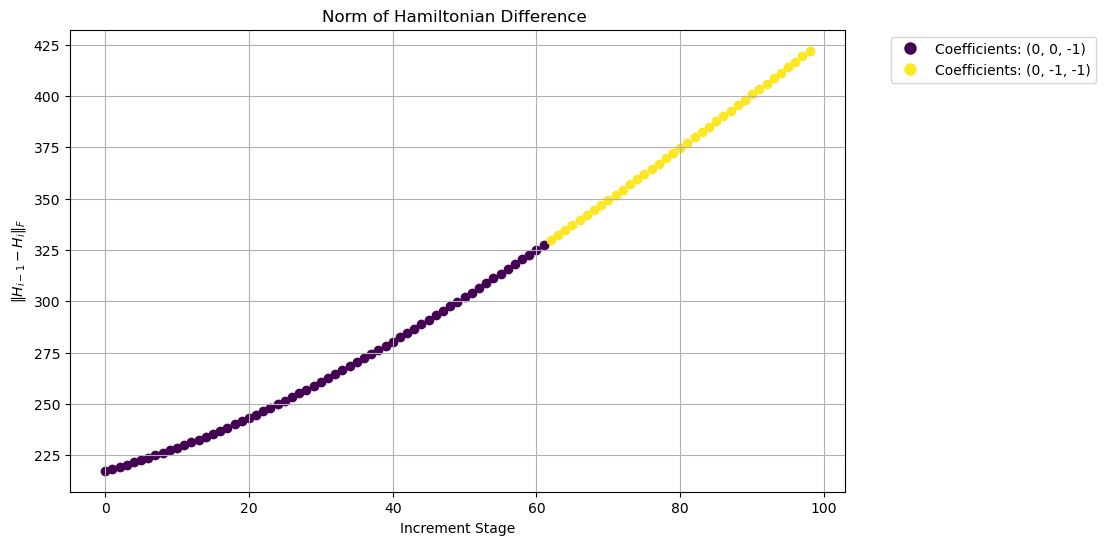

In [4]:
def pauli_z():
    return np.array([[1, 0], [0, -1]])

def identity():
    return np.eye(2)

def tensor_product(operators):
    result = operators[0]
    for op in operators[1:]:
        result = np.kron(result, op)
    return result

# define qudit operators #
def qudit_operator_1():
    I = identity()
    Z1 = pauli_z()
    Z2 = pauli_z()
    Z3 = pauli_z()
    return (1/2) * tensor_product([I, I, I, I, I, I, I, I, I]) + \
           (1/2) * tensor_product([Z1, I, I, I, I, I, I, I, I]) + \
           tensor_product([I, Z2, I, I, I, I, I, I, I]) + \
           2 * tensor_product([I, I, Z3, I, I, I, I, I, I])

def qudit_operator_2():
    I = identity()
    Z4 = pauli_z()
    Z5 = pauli_z()
    Z6 = pauli_z()
    return (1/2) * tensor_product([I, I, I, I, I, I, I, I, I]) + \
           (1/2) * tensor_product([I, I, I, Z4, I, I, I, I, I]) + \
           tensor_product([I, I, I, I, Z5, I, I, I, I]) + \
           2 * tensor_product([I, I, I, I, I, Z6, I, I, I])

def qudit_operator_3():
    I = identity()
    Z7 = pauli_z()
    Z8 = pauli_z()
    Z9 = pauli_z()
    return (1/2) * tensor_product([I, I, I, I, I, I, I, I, I]) + \
           (1/2) * tensor_product([I, I, I, I, I, I, Z7, I, I]) + \
           tensor_product([I, I, I, I, I, I, I, Z8, I]) + \
           2 * tensor_product([I, I, I, I, I, I, I, I, Z9])

def construct_hamiltonian(qudit_operators, gramm_matrix):
    H = np.zeros((512, 512))  # size is now 512x512 for 9 qubits
    for i in range(len(qudit_operators)):
        for j in range(len(qudit_operators)):
            H += gramm_matrix[i, j] * np.dot(qudit_operators[i], qudit_operators[j])
    return H

# Gram matrix from the basis vectors
def calculate_gram_matrix(e_x, e_y, e_z):
    G = np.zeros((3, 3))
    G[0, 0] = np.dot(e_x, e_x)
    G[0, 1] = np.dot(e_x, e_y)
    G[0, 2] = np.dot(e_x, e_z)
    G[1, 0] = np.dot(e_y, e_x)
    G[1, 1] = np.dot(e_y, e_y)
    G[1, 2] = np.dot(e_y, e_z)
    G[2, 0] = np.dot(e_z, e_x)
    G[2, 1] = np.dot(e_z, e_y)
    G[2, 2] = np.dot(e_z, e_z)
    return G

hamiltonian_diff_norms = []
coefficients_list = []

Q1 = qudit_operator_1()
Q2 = qudit_operator_2()
Q3 = qudit_operator_3()
qudit_operators = [Q1, Q2, Q3]

# the initial Hamiltonian
first_result = results[0]
G_initial = calculate_gram_matrix(first_result['incremented_e_x'], first_result['incremented_e_y'], first_result['incremented_e_z'])
H_initial = construct_hamiltonian(qudit_operators, G_initial)

# calculate the differences between consecutive Hamiltonians
previous_H = H_initial
for i, result in enumerate(results[1:], start=1):  # start from the second element
    incremented_e_x = result['incremented_e_x']
    incremented_e_y = result['incremented_e_y']
    incremented_e_z = result['incremented_e_z']
    best_a = result['best_a']
    best_b = result['best_b']
    best_c = result['best_c']
    
    G_incremented = calculate_gram_matrix(incremented_e_x, incremented_e_y, incremented_e_z)
    H_incremented = construct_hamiltonian(qudit_operators, G_incremented)
    diff_norm = np.linalg.norm(previous_H - H_incremented, 'fro')
    hamiltonian_diff_norms.append(diff_norm)
    coefficients_list.append((best_a, best_b, best_c))
    previous_H = H_incremented  

colors = plt.cm.viridis(np.linspace(0, 1, len(set(coefficients_list))))
color_map = {coeff: colors[i] for i, coeff in enumerate(set(coefficients_list))}

plt.figure(figsize=(10, 6))
for i, diff_norm in enumerate(hamiltonian_diff_norms):
    plt.scatter(i, diff_norm, color=color_map[coefficients_list[i]], label=f'Coefficients: {coefficients_list[i]}')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for coeff, color in color_map.items()]
labels = [f'Coefficients: {coeff}' for coeff in color_map.keys()]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Increment Stage')
plt.ylabel('$\|H_{i-1} - H_i\|_F$')
plt.title('Norm of Hamiltonian Difference ')
plt.grid(True)
plt.show()